# 1. Introduction/Business Problem

## Discussion of the business problem and the audience who would be interested in this project

With this project, I would like to bring your attention to a small beautifull town located in Bulgaria's coastline - Nessebar.
Nessebar is a favorite tourists spot when it comes to sun and culture on the Bulgarian Black Sea coast. With its UNESCO listed Old Town and some of the best coastline in the country Nessebar win hearts at first glance. Over 1 million tourists visit Nessebar every year.
When it comes to describing the sights of Nessebar, the majority of them are located in the old part of town, which is built on the beautiful picturesque island. Here simply everything is soaked in the atmosphere of tranquility and romance. All buildings of this part of the town were built during the Middle Ages. On the territory of the town are founded 40 ancient monasteries and churches, which were built mostly in the 5th – 6th centuries. On the border of the historic and new districts is an old windmill, which is considered one of the main symbols of Nessebar. In the Old Town, you can visit the Archaeological Museum containing priceless finds discovered by archaeologists during the city's exploration. Today, many of Nessebar's old churches are listed as UNESCO World Heritage sites. Another, no less interesting attraction for tourists is Action Aquapark some people consider it the best water park in all of Bulgaria, and all due to its excellent design and atmosphere.Nessebar has also preserved the ruins of the Byzantine baths, which are of great historical value.

Now lets see how many restaurants and hotels are located in Nessebar.

Here are the restaurants:

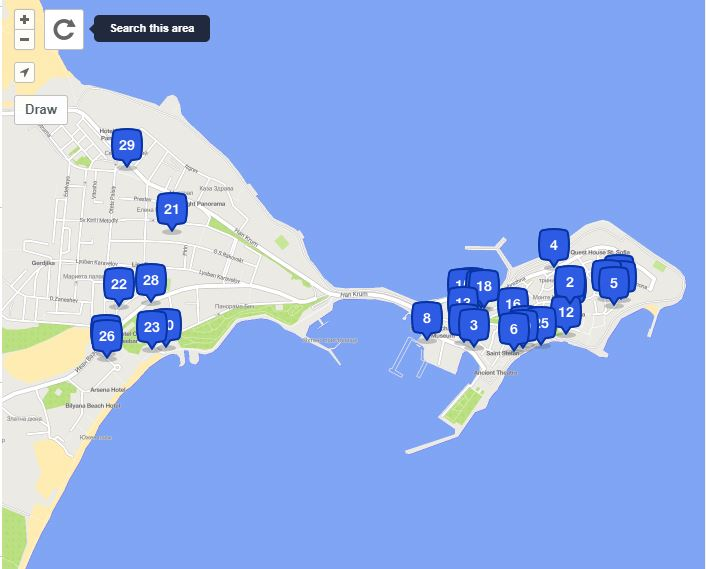

And the hotels:

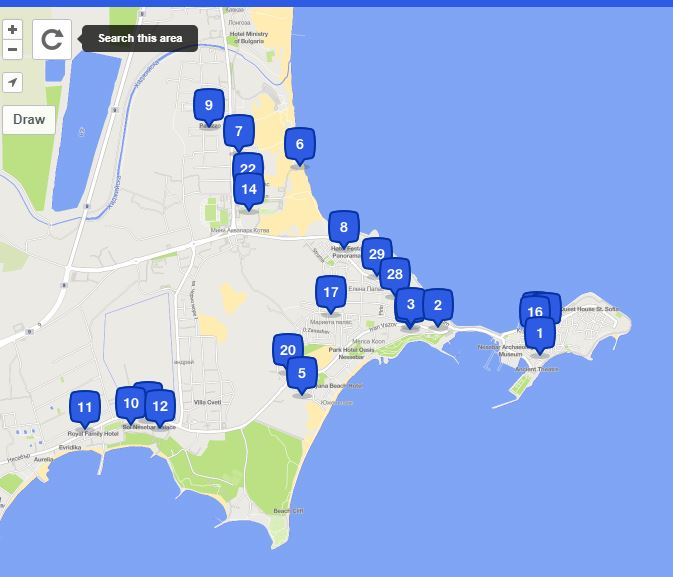

## Opening of Hotel/Restaurant

Coming down to business problem,I would like to address the stakeholders, interested in opening a Hotel or a Restaurant in this town. As we understand Nessebar is place with a great competition, especially, if you want to open a restaurant so I would like to help a possible stakeholder to understand better the town and the market with useful insights.

## Target audience

- A business entrepreneur that wants open a new restaurant/hotel in Nessebar.
- Someone curious about data that want to have an idea, how beneficial it is to open a restaurant and what are the pros and cons of this business.

## Data section

We will be completely working on Foursquare data to explore and try to find the best location for a new hotel where more venues like church, temples, beach, museums, memorials that are present nearby.
We will looking for midpoint area of venues to locate the new hotel.Before that our major focus will be on all venues present in and around the core place of Nessebar.

## Importing Libraries

In [14]:
!pip install geopy    
!pip install folium   
!pip install geocoder

import numpy as np # data in a vectorized manner manipulation
import pandas as pd # data analsysis
import requests # HTTP library
from bs4 import BeautifulSoup # scraping library

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import json # JSON files manipulation

from sklearn.cluster import KMeans # clustering algorithm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print("*********   Loaded library     ***********")

*********   Loaded library     ***********


In [15]:
CLIENT_ID = 'OTMLI0Q0HADZATKTNPMKTG3VNZPA5TG5UCCI2QQU53YWVPI1' # your Foursquare ID
CLIENT_SECRET = 'VUQT1VTOJW15DRMLAP0FVJZ1HKLBDGWNFZ0JFKJHLHXOQONM' # your Foursquare Secret
VERSION = '20210305'
LIMIT = 150

address = "Nesebar, Bulgaria"

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude =location.latitude  
longitude =location.longitude 

ns='Nesebar location : {},{}'.format(latitude,longitude)
print(ns)

Nesebar location : 42.6607865,27.7167464


In [16]:
search_query = 'hotel'
search_query_res = 'restaurant'

radius = 1000
url_hotel = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url_restaurant = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query_res, radius, LIMIT)

In [17]:
results_hotel = requests.get(url_hotel).json()
results_restaurant = requests.get(url_restaurant).json()

In [18]:
venues_hotel = results_hotel['response']['venues']
venues_restaurant = results_restaurant['response']['venues']

# tranform venues into a dataframe and merging both data
dataframe_hotel = json_normalize(venues_hotel)
dataframe_restaurant = json_normalize(venues_restaurant)

dataframe = pd.concat([dataframe_hotel,dataframe_restaurant])

print("There are {} restaurants and hotels in Nesebar".format(dataframe.shape[0]))

There are 75 restaurants and hotels in Nesebar


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [19]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

    
# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

  
# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

#dataframe_filtered
hotels_df=dataframe_filtered[['name','categories','distance','lat','lng','id']]
hotels_df.head()

,name,categories,distance,lat,lng,id
0,Hotel Festa Panorama,Hotel,410,42.664473,27.716482,4deb34d3fa76cc1b8afa2489
1,Hotel Imperial Pool,Hotel Pool,1069,42.668427,27.708833,4e403babd164b52911d0866a
2,Imperial hotel,Hotel,1020,42.668136,27.709301,579d8323498e2f4293f1724d
3,хотел Империал (Imperial Hotel),Hotel,1073,42.668109,27.708211,4e694228d4c0a5c38af6f201
4,Hotel - Кьща За Гости Детелина,Boarding House,102,42.660503,27.717939,51e46bb4498e535df672bcfc


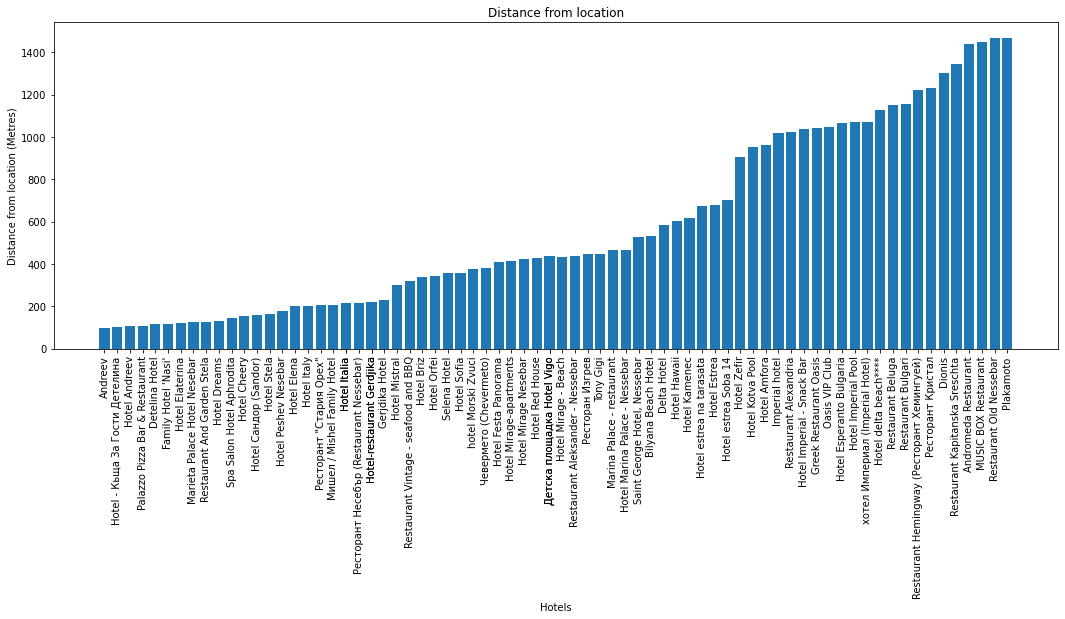

Average distance between hotels and core location is 567 metres


In [71]:
distance_hotel_df=dataframe_filtered[['name','categories','distance','lat','lng']].sort_values('distance')

def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(distance_hotel_df.name))
    plt.figure(figsize=(18,6))
    plt.bar(distance_hotel_df.name, distance_hotel_df.distance)
    plt.xlabel('Hotels')
    plt.ylabel('Distance from location (Metres)')
    plt.xticks(distance_hotel_df.name,rotation=90)
    plt.title('Distance from location')
    plt.show()
plot_bar_x()

print("Average distance between hotels and core location is {} metres".format(int(sum(hotels_df['distance'])/hotels_df.shape[0])))

## Explore for other venues around Nesebar

A tourist person always wants to visit nearby iconic places.So he wants to reside somewhere nearby to all major venues.We will be exploring more venues around the core location.We will be digging more on main areas or place around 1 km.

In [21]:
radius=1000
url_venues = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)

In [22]:
import requests

results_venues = requests.get(url_venues).json()
'There are {} venues around Nesebar.'.format(len(results_venues['response']['groups'][0]['items']))

'There are 66 venues around Nesebar.'

In [23]:
items_venues = results_venues['response']['groups'][0]['items']

In [24]:
dataframe_venues = json_normalize(items_venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe_venues.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered_venues = dataframe_venues.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered_venues['venue.categories'] = dataframe_filtered_venues.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered_venues.columns = [col.split('.')[-1] for col in dataframe_filtered_venues.columns]

dataframe_filtered_venues.name

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


0                                    Kanela Bar & Grill
1                               Ресторант "Стария Орех"
2                                          Градски парк
3                                        Старият Кестен
4                                   Cafe & Bakery Foyer
5                                             Южен бряг
6              Южен плаж Несебър (South beach Nessebar)
7                                              SOFI HUT
8               Ресторант Несебър (Restaurant Nessebar)
9                                                 Jambo
10                               Чевермето (Chevermeto)
11                                              Caramel
12    Вятърната мелница (The Old Windmill) (Вятърнат...
13                                         Elizabeth Dy
14                                           White Rose
15                       Hotel Marina Palace - Nessebar
16                                           Mario Cafe
17                                             T

In [25]:
search_query_list = ['temple','church','park','museum'] 
radius =1000
temp_df=[]
search_df=[]

def search_query_fn():   
    #Loop to run through urls and from json to pandas
    for i in range(len(search_query_list)):
        url= 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query_list[i], radius, LIMIT)
        
        results=requests.get(url).json()
        venues = results['response']['venues']
        
        #Normalize from json
        dataframe = json_normalize(venues)
        
        #Removing unwanted column headers
        dataframe.columns = [col.split('.')[-1] for col in dataframe.columns]
        temp_df.append(dataframe)
    
    #Loop to append dataframes to single dataframe
    for j in range(len(search_query_list)):
        data=temp_df[j]
        search_df.append(data)

# Function to run loop over queries
search_query_fn()

search_df = pd.concat(search_df,sort=True)
search_df['categories'] = search_df.apply(get_category_type, axis=1)
search_df = pd.DataFrame(search_df[['name','categories','distance','lat','lng','id']])
search_df

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:15: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,name,categories,distance,lat,lng,id
0,The Church of St. John Aliturgetos | Църквата ...,Church,1394,42.657690,27.733253,503f86d6e4b047609361e596
1,The Church of Christ Pantocrator | Църква Хрис...,Church,1373,42.658628,27.733260,4e3986c718a8d2fcc62cbdf6
2,The Church of St. Stephen - The New Bishopric ...,Church,1389,42.657711,27.733202,503f828de4b0ed99b8674ebf
3,The Amphitheatre (Амфитеатъра),Historic Site,1391,42.656968,27.732935,4e35a1e652b17fb1c60a2a39
0,South Park,Park,157,42.659391,27.717047,4e56c81cb0fbf4af4aee37b6
1,Chicken Park,Housing Development,245,42.662993,27.716616,51ea3418498e513784918b8c
2,Bus Stop Action Aqua Park Sunny Beach,Bus Stop,489,42.656725,27.714464,597595d9b9ac383dd3b9067a
3,Nessebar Theme Park,Theme Park,643,42.660920,27.724599,4e3079db1f6e283ad284f1d0
4,Delta Apartment Complex Parking Lot,Parking,561,42.664974,27.712927,516d7ed4e4b020db2afd67c9
0,Археологически Музей Несебър (Archeological Mu...,History Museum,1176,42.658662,27.730829,4e54ea60c65b9614d8ec6d9f


In [26]:
# Data extracted from foursquare venues
four_sq_venue=pd.DataFrame(dataframe_filtered_venues[['name','categories','distance','lat','lng','id']])

# Data extracted from search queries
new_venues=pd.DataFrame(search_df)

# Concatenate both dataframe
df_venue=pd.concat([four_sq_venue, new_venues],sort=True)

## Let us remove hotel & restaurants and get final list of venues.
We could see that there are some hotels/restaurants in the venues list.So we will remove them from the list.We have them in separate dataframe (hotels_df).

In [27]:
to_drop = ['Hotel', 'Restautant','hotel','Resort']
df_venues = df_venue[~df_venue['name'].str.contains('|'.join(to_drop))].reset_index()
print("There are {} venues in Nesebar".format(df_venues.shape[0]))
df_venues[['name','distance','id']]

There are 69 venues in Nesebar


,name,distance,id
0,Kanela Bar & Grill,191,589364084f218a63bfba517c
1,"Ресторант ""Стария Орех""",205,501d4b8ee4b07ccc38574bcf
2,Градски парк,440,4e6ce8feb993061ea907fdb6
3,Старият Кестен,358,4fcb92b4e4b076524e2b4c17
4,Cafe & Bakery Foyer,377,51bcdb98498e575ae192387d
5,Южен бряг,363,502795b6e4b0ca628a237a3a
6,Южен плаж Несебър (South beach Nessebar),625,4c614f89b6f3be9ab7506173
7,SOFI HUT,297,4e072775e4cdefcff6da40d6
8,Ресторант Несебър (Restaurant Nessebar),215,4e49667962e13240b6f15b33
9,Jambo,122,4dfb3e75e4cd567936083aed


## Location of all venues

In [28]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=16) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Kanyakumari
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='kanyakumari',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(df_venues.lat, df_venues.lng, df_venues.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='black',
        #popup=label,
        fill = True,
        fill_color='black',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

### How far are venues from the core location?

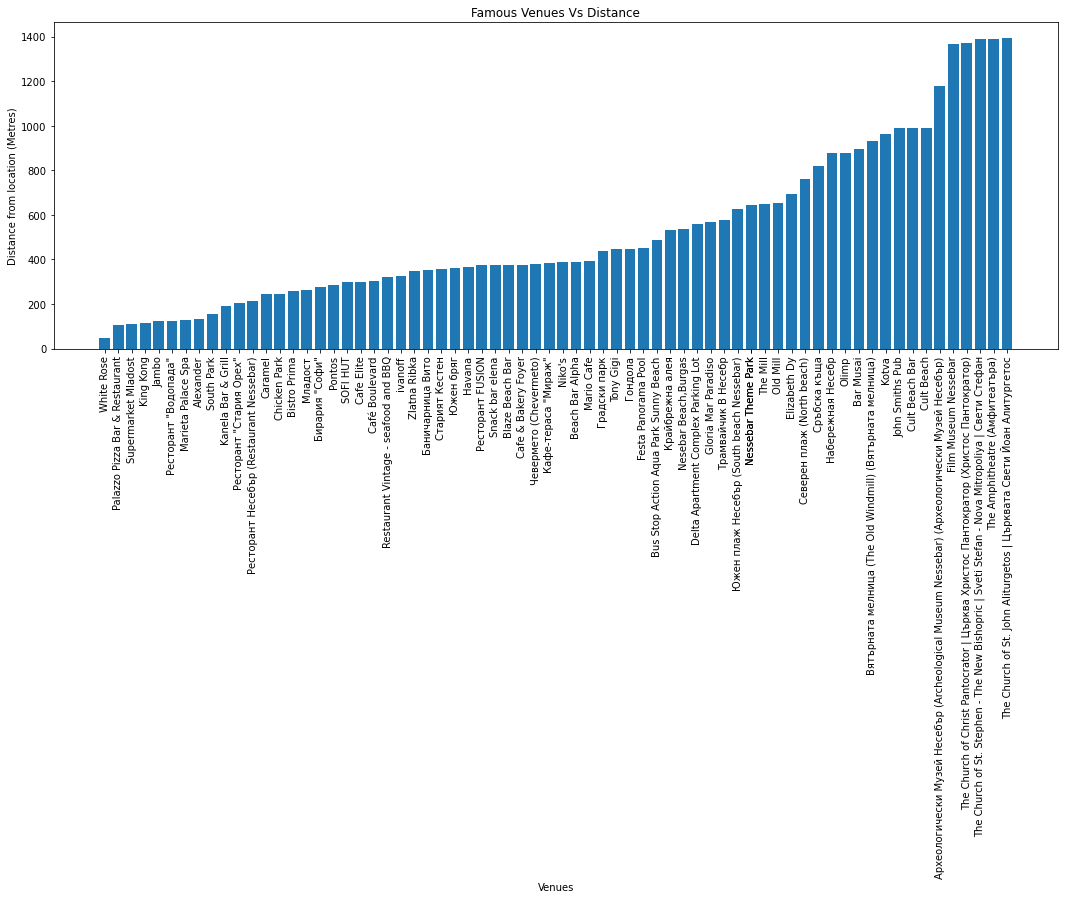

In [69]:
distance_venues_df=df_venues.sort_values('distance')

def plot_bar_venue():
    # this is for plotting purpose
    index = np.arange(len(distance_venues_df.name))
    plt.figure(figsize=(18,6))
    plt.bar(distance_venues_df.name, distance_venues_df.distance)
    plt.xlabel('Venues')
    plt.ylabel('Distance from location (Metres)')
    plt.xticks(distance_venues_df.name,rotation=90)
    plt.title('Famous Venues Vs Distance')
    plt.show
plot_bar_venue()

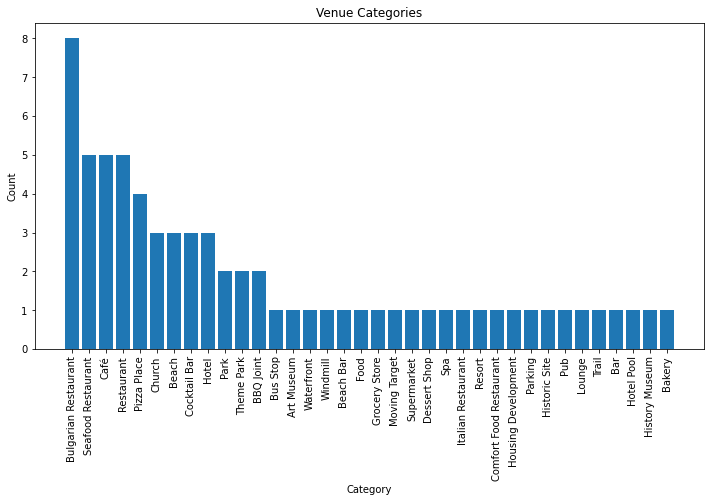

In [70]:
freq_venue=df_venues['categories'].value_counts()
freq_venue=pd.DataFrame(freq_venue).reset_index()
freq_venue.columns=['Category','Count']
freq_venue

def plot_bar_categ():
    # this is for plotting purpose
    index = np.arange(len(freq_venue.Category))
    plt.figure(figsize=(12,6))
    plt.bar(freq_venue.Category, freq_venue.Count)
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(freq_venue.Category,rotation=90)
    plt.title('Venue Categories')
    plt.show()
plot_bar_categ()


From this bar plot we could easily see that in Nesebar the most common restaurants are those with Bulgarian food and seafood restaurants. So a good idea would be to open up a restaurant that has more international food or perhaps some asian food.

### Rating of all Venues

In [53]:

neighbor_onehot = pd.get_dummies(df_venues[['categories']], prefix="", prefix_sep="")


# add neighborhood column back to dataframe
neighbor_onehot['name'] = df_venues['name'] 

# move neighborhood column to the first column
fixed_columns = [neighbor_onehot.columns[-1]] + list(neighbor_onehot.columns[:-1])
neighbor_onehot = neighbor_onehot[fixed_columns]

neighbor_onehot.head()

,name,Art Museum,BBQ Joint,Bakery,Bar,Beach,Beach Bar,Bulgarian Restaurant,Bus Stop,Café,Church,Cocktail Bar,Comfort Food Restaurant,Dessert Shop,Food,Grocery Store,Historic Site,History Museum,Hotel,Hotel Pool,Housing Development,Italian Restaurant,Lounge,Moving Target,Park,Parking,Pizza Place,Pub,Resort,Restaurant,Seafood Restaurant,Spa,Supermarket,Theme Park,Trail,Waterfront,Windmill
0,Kanela Bar & Grill,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Ресторант ""Стария Орех""",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Градски парк,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,Старият Кестен,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Cafe & Bakery Foyer,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
neighbor_onehot.shape
neighbor_grouped = neighbor_onehot.groupby('name').mean().reset_index()

In [55]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['name'] = neighbor_grouped['name']


In [56]:
# Clustering

# set number of clusters
kclusters = 3

neighbor_grouped_clustering = neighbor_grouped.drop('name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(neighbor_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 


# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Clustersss', kmeans.labels_)

neighbor_merged = df_venues

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
neighbor_merged = neighbor_merged.join(neighborhoods_venues_sorted.set_index('name'), on='name')

kmeans

KMeans(n_clusters=3, random_state=0)

In [58]:
fin=neighbor_merged.groupby(['Clustersss']).mean()

lati=sum(fin.lat)/len(fin.lat)
longi=sum(fin.lng)/len(fin.lng)

#Taking midpoint of top ten closest hotel
venues_lan=sum(df_venues.lat)/len(df_venues.lat)
venues_lng=sum(df_venues.lng)/len(df_venues.lng)

final_latitude=(lati+venues_lan)/2
final_longitude=(longi+venues_lng)/2

print("Final location (Green Dot in our below given map) of our brand new hotel:{},{}".format(final_latitude,final_longitude))

Final location (Green Dot in our below given map) of our brand new hotel:42.660054606386936,27.718342823390866


In [59]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=17)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

folium.features.CircleMarker(
    [final_latitude, final_longitude],
    radius=10,
    color='green',
    popup='My hotel',
    fill = True,
    fill_color = 'green',
    fill_opacity = 0.6
).add_to(map_clusters)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighbor_merged['lat'], neighbor_merged['lng'], neighbor_merged['name'], neighbor_merged['Clustersss']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

       
map_clusters

The location gives the central point to visit all other venues.Hence this can be locked down to attract all tourist. It is also near the south beach, the main street with shops and to the sea garden. On walking distance you can hop on the tram that goes to the old town to have a romantic evening.

# Methodology

As a database, I used GitHub repository in my study. My master data which has the main components: Longitude and Latitude of Nesebar, Longitude and Latitude of Nesebar's attractions and distance between them.I used python folium library to visualize geographic details of Nesebar and its venues I used latitude and longitude values to get the visual as below:
    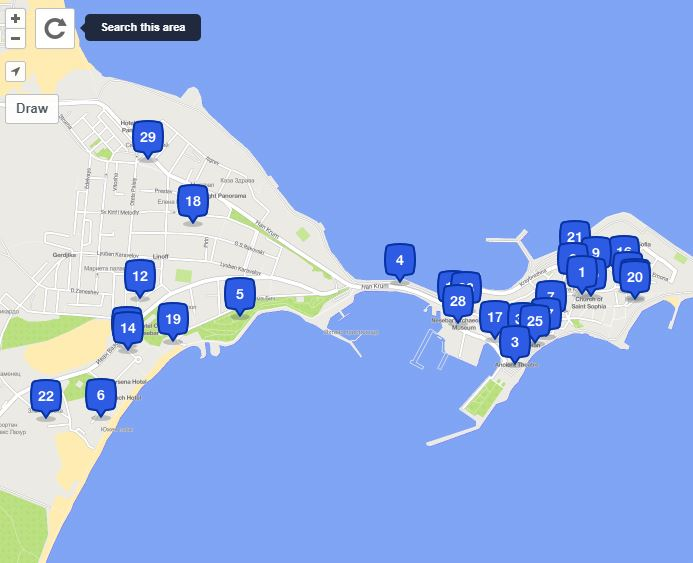


# Discussion section

From above reports,we could get an idea why the predicted one is pointed/clustered on the given spot.First most thing could be the center of attraction for the place.

KMeans have figured out the most common place for all the venues.This output was very close to the core location.This proves the accurate spotting of our predicted algorithm.

Despite of the findings,there were some lack in data.Tips and ratings were missing for the venues.Also when I compared foursquare data with google map ,i could see there were many hotels and venues found missing in foursquare.

# Conclusion

As a conclusion I would say that although there is a lot of competition around Nesebar, there are things that are still missing and if we want to attract more foreign tourists to this beautiful little town, we need to think about what they would like to have around.. As there is no possibility for building a hotel in the old town of Nesebar, we tried to find a location that would be near all of the attractions in Nesebar and the near cities as Burgas and Sunny Beach, which are also popular for tourists. 
We categorized the venues and we saw that most of the restaurants were ones with Bulgarian food and Seafood restaurants and that most of them are located in the old town. That brings me to an idea that a different type of restaurant can be open for people that don't want to go every night to the old town for dinner, for example one with international food or Asian food or even a burger place. I think that Nesebar has a lot to offer, and if we choose corectly we can create a successful and profitable bussiness
